# Define the Function for Classification

In [2]:
import os
import cv2
import mediapipe as mp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

In [3]:
gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [11]:
def extract_feature(input_image, is_a_frame):
    if is_a_frame == False:
        mp_hands = mp.solutions.hands
        mp_drawing = mp.solutions.drawing_utils 
        image = cv2.imread(input_image)
        with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.7) as hands:
            results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
            image_hight, image_width, _ = image.shape
            # Print handedness (left v.s. right hand).
            print(f'Handedness of {input_image}:')
            print(results.multi_handedness)

            # Draw hand landmarks of each hand.
            print(f'Hand landmarks of {input_image}:')
            if not results.multi_hand_landmarks:
                thumb_fingerX = 0
                thumb_fingerY = 0
                index_fingerX = 0
                index_fingerY = 0
                middle_fingerX = 0
                middle_fingerY = 0
                ring_fingerX = 0
                ring_fingerY = 0
                pinky_fingerX = 0
                pinky_fingerY = 0
                output_image = 0
                return thumb_fingerX, thumb_fingerY, index_fingerX, index_fingerY, middle_fingerX, middle_fingerY, ring_fingerX, ring_fingerY, pinky_fingerX, pinky_fingerY, output_image
            
            annotated_image = cv2.flip(image.copy(), 1)
            for hand_landmarks in results.multi_hand_landmarks:
                # Thumb Finger or Jari Jempol
                thumb_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_width
                # Index Finger or Jari Telunjuk
                index_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight
                # Middle Finger or Jari Tengah
                middle_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_width
                # Ring Finger or Jari Manis
                ring_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_width
                # Pinky Finger or Jari Kelingking
                pinky_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_width
                # Print index finger tip coordinates.
                #print(
                    #f'Index finger tip coordinate: (',
                    #f'{index_fingerX}, '
                     #f'{index_fingerY})')
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            return thumb_fingerX, thumb_fingerY, index_fingerX, index_fingerY, middle_fingerX, middle_fingerY, ring_fingerX, ring_fingerY, pinky_fingerX, pinky_fingerY, annotated_image
    else:
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands()
        mp_drawing = mp.solutions.drawing_utils 
        image = input_image
        results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))
        image_hight, image_width, _ = image.shape
        # Print handedness (left v.s. right hand).
        #print(f'Handedness of {input_image}:')
        #print(results.multi_handedness)

        # Draw hand landmarks of each hand.
        #print(f'Hand landmarks of {input_image}:')
        annotated_image = cv2.flip(image.copy(), 1)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Thumb Finger or Jari Jempol
                thumb_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
                thumb_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_width
                # Index Finger or Jari Telunjuk
                index_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
                index_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight
                # Middle Finger or Jari Tengah
                middle_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
                middle_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_width
                # Ring Finger or Jari Manis
                ring_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
                ring_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_width
                # Pinky Finger or Jari Kelingking
                pinky_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
                pinky_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_width
                # Print index finger tip coordinates.
                #print(
                    #f'Index finger tip coordinate: (',
                    #f'{index_fingerX}, '
                    #f'{index_fingerY})')
                mp_drawing.draw_landmarks(annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            return thumb_fingerX, thumb_fingerY, index_fingerX, index_fingerY, middle_fingerX, middle_fingerY, ring_fingerX, ring_fingerY, pinky_fingerX, pinky_fingerY, annotated_image
        else:
            thumb_fingerX = 0
            thumb_fingerY = 0
            index_fingerX = 0
            index_fingerY = 0
            middle_fingerX = 0
            middle_fingerY = 0
            ring_fingerX = 0
            ring_fingerY = 0
            pinky_fingerX = 0
            pinky_fingerY = 0
            return thumb_fingerX, thumb_fingerY, index_fingerX, index_fingerY, middle_fingerX, middle_fingerY, ring_fingerX, ring_fingerY, pinky_fingerX, pinky_fingerY, annotated_image

In [5]:
#Define Classes in Dictionary and Load Created Model Previously
classes = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25
}

model = tf.keras.models.load_model('model_SIBI.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 64)             256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 128)            24704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1

# Using Static Image for Classification

Handedness of B (4).jpg:
[classification {
  index: 1
  score: 0.99930185
  label: "Right"
}
]
Hand landmarks of B (4).jpg:
998.1327056884766 1113.724708557129 820.1308846473694 453.91762256622314 969.3848490715027 359.20143127441406 1087.913155555725 431.922972202301 1190.8698081970215 631.8845748901367


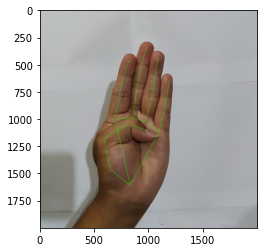

In [6]:
#Load Image and do Feature Extraction
path_to_image = "B (4).jpg"
is_a_frame = False
thumb_fingerX, thumb_fingerY, index_fingerX, index_fingerY, middle_fingerX, middle_fingerY, ring_fingerX, ring_fingerY, pinky_fingerX, pinky_fingerY, output_IMG = extract_feature(path_to_image, is_a_frame)
print(thumb_fingerX, thumb_fingerY, index_fingerX, index_fingerY, middle_fingerX, middle_fingerY, ring_fingerX, ring_fingerY, pinky_fingerX, pinky_fingerY)
plt.axis("on")
plt.imshow(cv2.cvtColor(output_IMG, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
#Shape the image features into an 1x3 array.
input_IMG = [[[thumb_fingerX], [thumb_fingerY],
              [index_fingerX], [index_fingerY],
              [middle_fingerX], [middle_fingerY], 
              [ring_fingerX], [ring_fingerY], 
              [pinky_fingerX], [pinky_fingerY]]]
IMG_array = np.array(input_IMG)
IMG_array.shape

(1, 10, 1)

In [8]:
#Print the Prediction
print(model.predict(IMG_array))
print(model.predict_classes(IMG_array))

[[0.0000000e+00 1.0000000e+00 6.9036043e-25 5.1000343e-27 2.5549839e-14
  7.6272379e-17 0.0000000e+00 2.7251045e-29 0.0000000e+00 6.5932340e-29
  3.1088279e-32 0.0000000e+00 2.8341416e-25 4.3843795e-34 7.9573479e-13
  1.6193982e-32 7.8873367e-29 1.0534228e-21 2.5421149e-27 0.0000000e+00
  4.1179945e-13 4.4791798e-21 8.5069859e-16 9.5603277e-22 0.0000000e+00
  5.4142688e-29]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[1]


In [9]:
#Print prediction using defined Classes
predictions = model.predict_classes(IMG_array)
for alphabets, values in classes.items():
    if values == predictions[0] :
        print(alphabets)

B


# Using Dynamic Images aka Video Webcam for Classification

## Using Function, Slow

In [25]:
cap = cv2.VideoCapture(0)
is_a_frame = True

pTime = 0
cTime = 0

while True:
    success, img = cap.read()
    thumb_fingerX, thumb_fingerY, index_fingerX, index_fingerY, middle_fingerX, middle_fingerY, ring_fingerX, ring_fingerY, pinky_fingerX, pinky_fingerY, output_IMG = extract_feature(img, is_a_frame)
    
    
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    
    cv2.putText(output_IMG, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    
    input_IMG = [[[thumb_fingerX], [thumb_fingerY],
              [index_fingerX], [index_fingerY],
              [middle_fingerX], [middle_fingerY], 
              [ring_fingerX], [ring_fingerY], 
              [pinky_fingerX], [pinky_fingerY]]]
    IMG_array = np.array(input_IMG)
    IMG_array.shape
    predictions = model.predict_classes(IMG_array)
    for alphabets, values in classes.items():
        if values == predictions[0] :
            text_prediction = alphabets
    cv2.putText(output_IMG, str(text_prediction), (70, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    
    cv2.imshow("Image", output_IMG)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

cap.release()
cv2.destroyAllWindows()

## Alternative, Faster

In [28]:
import cv2
import mediapipe as mp
import time
 
cap = cv2.VideoCapture(0)
 
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils
 
pTime = 0
cTime = 0
 
while True:
    success, img = cap.read()
    results = hands.process(cv2.flip(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 1))
    image_hight, image_width, _ = img.shape
    # print(results.multi_hand_landmarks)
    img = cv2.flip(img.copy(), 1)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Thumb Finger or Jari Jempol
            thumb_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x * image_width
            thumb_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y * image_width
            # Index Finger or Jari Telunjuk
            index_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width
            index_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight
            # Middle Finger or Jari Tengah
            middle_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x * image_width
            middle_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y * image_width
            # Ring Finger or Jari Manis
            ring_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x * image_width
            ring_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y * image_width
            # Pinky Finger or Jari Kelingking
            pinky_fingerX = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x * image_width
            pinky_fingerY = hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y * image_width
            # Print index finger tip coordinates.
            #print(
                #f'Index finger tip coordinate: (',
                #f'{index_fingerX}, '
                #f'{index_fingerY})')
            mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
 
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
    cv2.putText(img, str(int(fps)), (10, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    
    input_IMG = [[[thumb_fingerX], [thumb_fingerY],
              [index_fingerX], [index_fingerY],
              [middle_fingerX], [middle_fingerY], 
              [ring_fingerX], [ring_fingerY], 
              [pinky_fingerX], [pinky_fingerY]]]
    IMG_array = np.array(input_IMG)
    IMG_array.shape
    predictions = model.predict_classes(IMG_array)
    for alphabets, values in classes.items():
        if values == predictions[0] :
            text_prediction = alphabets
    cv2.putText(img, str(text_prediction), (90, 70), cv2.FONT_HERSHEY_PLAIN, 3,
                (255, 0, 255), 3)
    cv2.imshow("Image", img)
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

cap.release()
cv2.destroyAllWindows()